<a href="https://colab.research.google.com/github/bintangnabiil/Deep_Learning/blob/main/Deep_Learning_RNN_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Model RNN Tensorflow

##1. Install dan Import Libraries

In [3]:
# Install TensorFlow
!pip install tensorflow --quiet

import tensorflow as tf
from tensorflow.keras.datasets import imdb as tf_imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences as tf_pad_sequences
from tensorflow.keras.models import Sequential as TfSequential
from tensorflow.keras.layers import Embedding as TfEmbedding, SimpleRNN, Dense as TfDense, Dropout as TfDropout, BatchNormalization as TfBatchNorm

##2. Load dataset

In [4]:
tf_num_words = 50000
tf_maxlen = 500

(tf_x_train, tf_y_train), (tf_x_test, tf_y_test) = tf_imdb.load_data(num_words=tf_num_words)
tf_x_train = tf_pad_sequences(tf_x_train, maxlen=tf_maxlen)
tf_x_test = tf_pad_sequences(tf_x_test, maxlen=tf_maxlen)

##3. Build Model

In [8]:
# Build model
tf_model = TfSequential([
    TfEmbedding(input_dim=tf_num_words, output_dim=128),
    SimpleRNN(128, return_sequences=True),
    TfDropout(0.5),
    TfBatchNorm(),
    SimpleRNN(64),
    TfDropout(0.5),
    TfDense(64, activation='relu'),
    TfDense(1, activation='sigmoid')
])

# Build
tf_model.build(input_shape=(None, tf_maxlen))

# Compile (harus setelah build!)
tf_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary
tf_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 500, 128)       │     6,400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 500, 128)       │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 500, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 500, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,449,985 (24.60 MB)

 Trainable params: 6,449,729 (24.60 MB)

 Non-trainable params: 256 (1.00 KB)

##5. Train

In [9]:
tf_history = tf_model.fit(tf_x_train, tf_y_train, epochs=5, batch_size=128, validation_data=(tf_x_test, tf_y_test))

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 172s 862ms/step - accuracy: 0.5017 - loss: 0.7437 - val_accuracy: 0.4961 - val_loss: 0.6994
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 207s 886ms/step - accuracy: 0.4996 - loss: 0.7073 - val_accuracy: 0.5057 - val_loss: 0.6930
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 201s 883ms/step - accuracy: 0.5072 - loss: 0.7020 - val_accuracy: 0.5044 - val_loss: 0.6919
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 204s 892ms/step - accuracy: 0.5838 - loss: 0.6633 - val_accuracy: 0.7563 - val_loss: 0.5116
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 201s 888ms/step - accuracy: 0.7291 - loss: 0.5456 - val_accuracy: 0.5399 - val_loss: 0.8189


##6. Plot Akurasi dan Loss

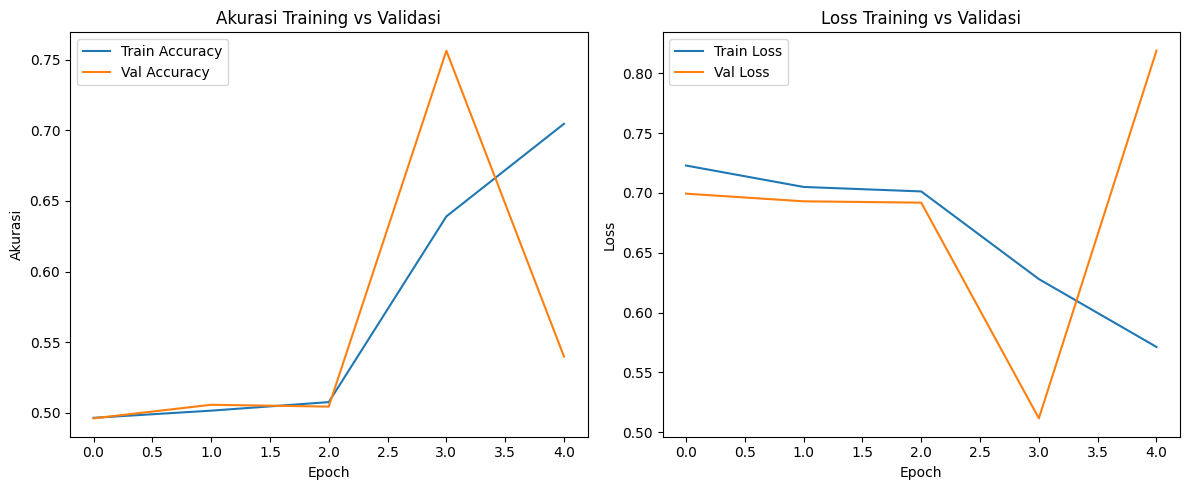

In [10]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(tf_history.history['accuracy'], label='Train Accuracy')
plt.plot(tf_history.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Training vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(tf_history.history['loss'], label='Train Loss')
plt.plot(tf_history.history['val_loss'], label='Val Loss')
plt.title('Loss Training vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

##7. Evaluasi Model

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import seaborn as sns

# Prediksi (hasil probabilitas)
tf_y_pred_prob = tf_model.predict(tf_x_test)

# Konversi ke label biner
tf_y_pred = (tf_y_pred_prob > 0.5).astype(int)

# Hitung metrik
acc = accuracy_score(tf_y_test, tf_y_pred)
prec = precision_score(tf_y_test, tf_y_pred)
rec = recall_score(tf_y_test, tf_y_pred)
f1 = f1_score(tf_y_test, tf_y_pred)
auc = roc_auc_score(tf_y_test, tf_y_pred_prob)

print(f"Akurasi:  {acc:.4f}")
print(f"Presisi:  {prec:.4f}")
print(f"Recall:   {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC:  {auc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step
Akurasi:  0.5399
Presisi:  0.9455
Recall:   0.0846
F1 Score: 0.1554
ROC AUC:  0.7776


##8. Visualisasi Matriks dan ROC Curve

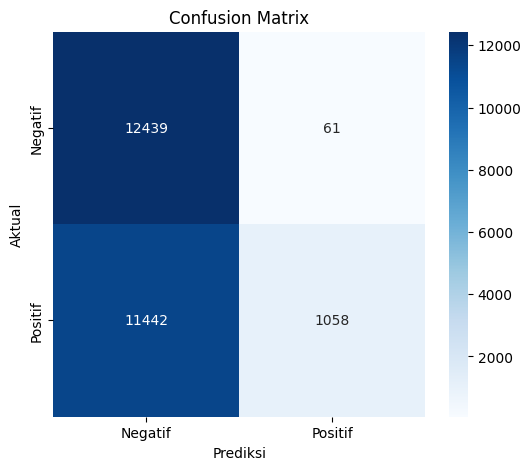

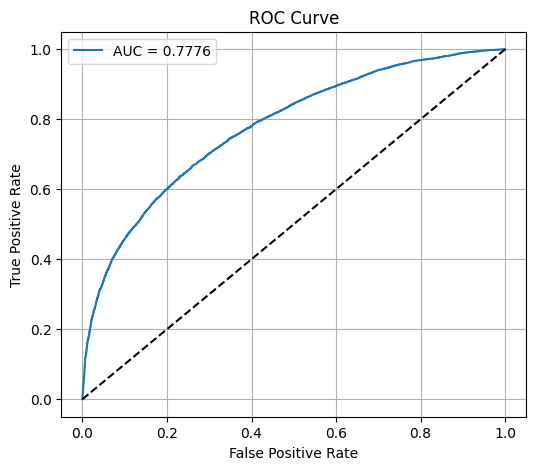

In [12]:
cm = confusion_matrix(tf_y_test, tf_y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negatif", "Positif"], yticklabels=["Negatif", "Positif"])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(tf_y_test, tf_y_pred_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

#2) Model RNN PyTorch

##1. Install dan Import Libraries

In [29]:
!pip install torch torchvision --quiet

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

##2. Load Data dan Processing

In [30]:
py_num_words = 50000
py_maxlen = 500

(py_x_train, py_y_train), (py_x_test, py_y_test) = tf.keras.datasets.imdb.load_data(num_words=py_num_words)

py_x_train = tf.keras.preprocessing.sequence.pad_sequences(py_x_train, maxlen=py_maxlen)
py_x_test = tf.keras.preprocessing.sequence.pad_sequences(py_x_test, maxlen=py_maxlen)

##3. Konversi ke Tensors

In [31]:
py_x_train = torch.tensor(py_x_train, dtype=torch.long)
py_y_train = torch.tensor(py_y_train, dtype=torch.float32)
py_x_test = torch.tensor(py_x_test, dtype=torch.long)
py_y_test = torch.tensor(py_y_test, dtype=torch.float32)

##4. DataLoader

In [32]:
py_batch_size = 128
py_train_dataset = TensorDataset(py_x_train, py_y_train)
py_test_dataset = TensorDataset(py_x_test, py_y_test)

py_train_loader = DataLoader(py_train_dataset, batch_size=py_batch_size, shuffle=True)
py_test_loader = DataLoader(py_test_dataset, batch_size=py_batch_size)

##5. Model RNN

In [33]:
class PyTorchRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(PyTorchRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn1 = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.norm = nn.BatchNorm1d(hidden_dim)
        self.rnn2 = nn.RNN(hidden_dim, hidden_dim // 2, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim // 2, 64)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        out, _ = self.rnn1(x)
        out = self.dropout(out[:, -1, :])
        out = self.norm(out)
        out, _ = self.rnn2(out.unsqueeze(1))
        out = self.dropout(out[:, -1, :])
        out = self.fc1(out)
        out = self.fc2(out)
        return self.sigmoid(out).squeeze()

##6. Inisialisasi Model

In [34]:
py_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

py_model = PyTorchRNN(vocab_size=py_num_words, embedding_dim=128, hidden_dim=128)
py_model = py_model.to(py_device)

py_criterion = nn.BCELoss()
py_optimizer = torch.optim.Adam(py_model.parameters(), lr=0.001)

##7. Training Setup

In [35]:
py_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
py_model = PyTorchRNN(vocab_size=py_num_words, embedding_dim=128, hidden_dim=128).to(py_device)
py_criterion = nn.BCELoss()
py_optimizer = optim.Adam(py_model.parameters(), lr=0.001)

py_train_losses = []
py_val_accuracies = []

##8. Training Loop

In [36]:
for py_epoch in range(5):
    py_model.train()
    py_total_loss = 0

    for py_batch_x, py_batch_y in py_train_loader:
        py_batch_x, py_batch_y = py_batch_x.to(py_device), py_batch_y.to(py_device)
        py_optimizer.zero_grad()
        py_output = py_model(py_batch_x)
        py_loss = py_criterion(py_output, py_batch_y)
        py_loss.backward()
        py_optimizer.step()
        py_total_loss += py_loss.item()

    py_train_losses.append(py_total_loss / len(py_train_loader))

    # Eval akurasi di test set
    py_model.eval()
    py_all_preds = []
    py_all_labels = []

    with torch.no_grad():
        for py_batch_x, py_batch_y in py_test_loader:
            py_batch_x, py_batch_y = py_batch_x.to(py_device), py_batch_y.to(py_device)
            py_preds = py_model(py_batch_x)
            py_all_preds.extend(py_preds.cpu().numpy())
            py_all_labels.extend(py_batch_y.cpu().numpy())

    py_preds_bin = (np.array(py_all_preds) > 0.5).astype(int)
    py_val_acc = accuracy_score(py_all_labels, py_preds_bin)
    py_val_accuracies.append(py_val_acc)

    print(f"Epoch {py_epoch+1} | Loss: {py_train_losses[-1]:.4f} | Val Acc: {py_val_acc:.4f}")

Epoch 1 | Loss: 0.6801 | Val Acc: 0.5976
Epoch 2 | Loss: 0.6417 | Val Acc: 0.5922
Epoch 3 | Loss: 0.6506 | Val Acc: 0.6005
Epoch 4 | Loss: 0.6397 | Val Acc: 0.6252
Epoch 5 | Loss: 0.5834 | Val Acc: 0.7118


##9. Plot Loss dan Akurasi

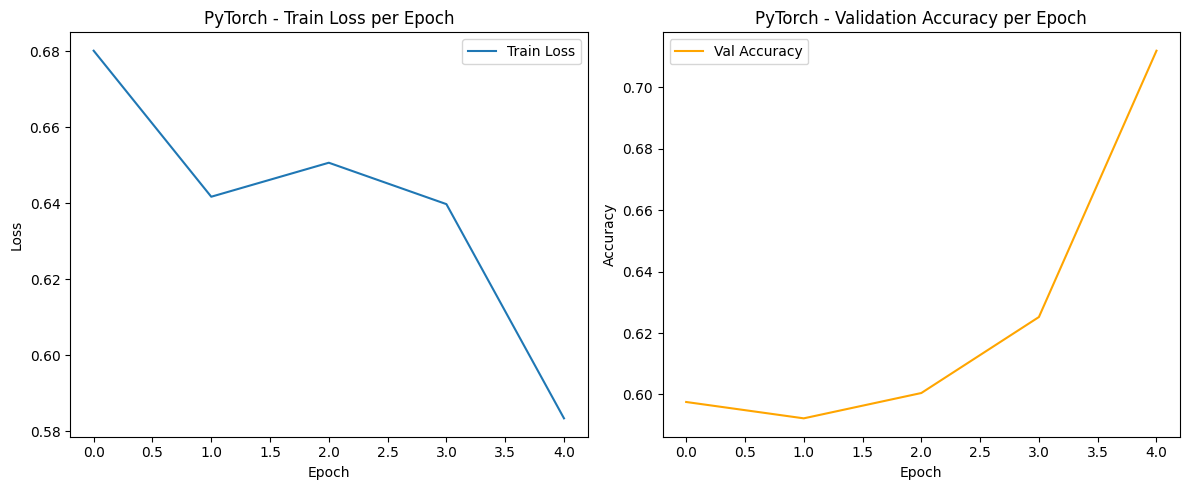

In [37]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(py_train_losses, label='Train Loss')
plt.title('PyTorch - Train Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(py_val_accuracies, label='Val Accuracy', color='orange')
plt.title('PyTorch - Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

##10. Evaluasi dan Visualisasi

In [38]:
py_acc = accuracy_score(py_all_labels, py_preds_bin)
py_prec = precision_score(py_all_labels, py_preds_bin)
py_rec = recall_score(py_all_labels, py_preds_bin)
py_f1 = f1_score(py_all_labels, py_preds_bin)
py_auc = roc_auc_score(py_all_labels, py_all_preds)

print(f"[PyTorch] Akurasi:  {py_acc:.4f}")
print(f"[PyTorch] Presisi:  {py_prec:.4f}")
print(f"[PyTorch] Recall:   {py_rec:.4f}")
print(f"[PyTorch] F1 Score: {py_f1:.4f}")
print(f"[PyTorch] ROC AUC:  {py_auc:.4f}")

[PyTorch] Akurasi:  0.7118
[PyTorch] Presisi:  0.7842
[PyTorch] Recall:   0.5846
[PyTorch] F1 Score: 0.6698
[PyTorch] ROC AUC:  0.7806


##11. Confusion Matrix dan ROC Curve

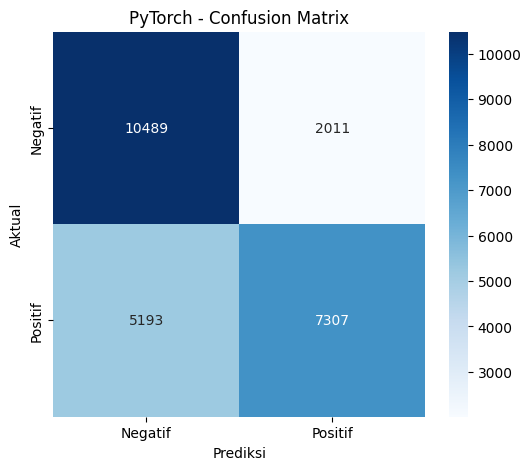

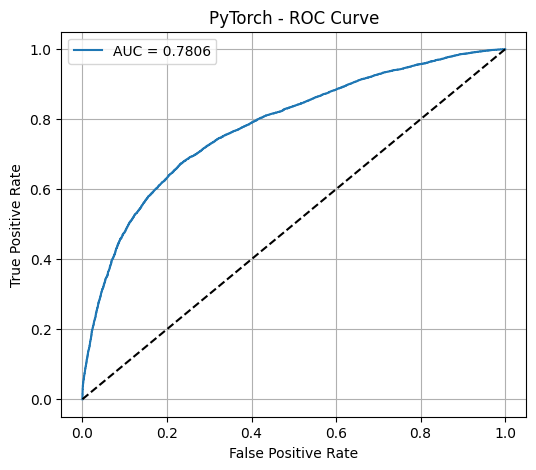

In [39]:
# Confusion Matrix
py_cm = confusion_matrix(py_all_labels, py_preds_bin)
plt.figure(figsize=(6, 5))
sns.heatmap(py_cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negatif", "Positif"], yticklabels=["Negatif", "Positif"])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('PyTorch - Confusion Matrix')
plt.show()

# ROC Curve
py_fpr, py_tpr, _ = roc_curve(py_all_labels, py_all_preds)
plt.figure(figsize=(6, 5))
plt.plot(py_fpr, py_tpr, label=f'AUC = {py_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('PyTorch - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

#3) Penjelasan Persamaan Matematika
##1. Embedding Layer
Layer ini mengubah integer (index kata) menjadi vektor berdimensi tetap.

Misalnya, kalau kita punya kata indeks $w_i$, maka embedding-nya:
$$
e_i = Embedding(w_i) \in ℝ^d
$$

di mana $d$ adalah embedding dimension (misalnya 128).<br><br>

##2. RNN Layer
RNN menerima input sekuens dan mengolahnya satu per satu secara berurutan. Rumus dasarnya:
$$
h_t = tanh(W_{xh}x_t + W_{hh}h_{t-1} +b_h)
$$

Keterangan:
- $x_t$ = input pada waktu $t$
- $h_{t-1}$ = hidden state sebelumnya
- $W_{xh}, W_{hh}$ = bobot dan bias
- $tanh$ = fungsi aktivasi (non-linear)<br><br>

##3. Dropout
Dropout tidak punya persamaan khusus, tapi secara matematis:
- Dropout secara acak mengatur sebagian elemen vektor input menjadi 0 dengan probabilitas $p$ (misal 0.5).
- Digunakan untuk mencegah overfitting.<br><br>

##4. Batch Normalization
Normalisasi output agar distribusi tetap stabil selama training.
$$
\hat{x} = \frac{x-μ}{\sqrt{\sigma^2+ϵ}} \cdot γ+\beta
$$

Keterangan:
- $μ,\sigma$ = mean dan std dari batch
- $γ,\beta$ = parameter yang bisa dilatih (untuk scaling & shifting)<br><br>

##5. Dense/Linear Layer
Setiap layer dense (fully connected) melakukan transformasi linear:
$$
z = W_x+b
$$

Keterangan:
- $x$ = input vektor
- $W$ = bobot
- $b$ = bias
- $z$ = output dari layer linear<br><br>

##6. Sigmoid Activation Function
Digunakan di akhir model untuk membuat output antara 0 dan 1 (karena binary classification):
$$
\hat{y} = \sigma(z) = \frac{1}{1+e^{-z}}
$$<br><br>

##7. Loss Function: Binary Cross Entropy
Digunakan untuk mengukur seberapa jauh prediksi dari target:
$$
𝓛(y,\hat{y}) = -y \cdot log(\hat{y}) - (1-y) \cdot log(1-\hat{y})
$$

Keterangan:
- $y$ = label asli (0 atau 1)
- $\hat{y}$ = prediksi model (probabilitas)<br><br>

##8. Akurasi
$$
Accuracy = \frac{TP + TN}{TP+TN+FP+FN}
$$

Keterangan:
- TP = True Positive
- TN = True Negative
- FP = False Positive
- FN = False Negative

Bagus digunakan jika data seimbang (jumlah kelas 0 dan 1 hampir sama). Kurang berguna jika data tidak seimbang, karena bisa menyesatkan.<br><br>

##9. Presisi
$$
Precision = \frac{TP}{TP+FP}
$$

Fokus ke “keakuratan” prediksi positif. Cocok jika kesalahan positif berbahaya (misalnya spam classifier)<br><br>

##10. Recall (Sensitivity/True Positvie Rate)
$$
Recall = \frac{TP}{TP+FN}
$$

Cocok kalau kita lebih mementingkan menangkap semua kasus positif (misalnya deteksi penyakit)<br><br>

##11. F1-Score
$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision+Recall}
$$

Cocok jika ingin keseimbangan antara precision dan recall. Misalnya di sistem review IMDb ini, kita ingin model tidak terlalu banyak salah prediksi positif dan tidak melewatkan yang seharusnya positif.

##12.AUC dan ROC
ROC Curve menunjukkan trade-off antara True Positive Rate (Recall) dan False Positive Rate
- Sumbu Y: TPR(Recall)
- Sumbu X: FPR = $\frac{FP}{FP+TN}$

AUC merupakan luas di bawah ROC curve. Nilai AUC antara 0-1.
$$
AUC = \int_{0}^1 TPR(FPR)dFPR
$$

- AUC = 1 artinya model sempurna
- AUC = 0.5 artinya model seperti nebak acak